In [172]:
import fastf1 as ff1
from fastf1 import plotting
import numpy as np
from matplotlib import pyplot as plt

In [173]:
# Team and drivers colors
team_colors = {
    'Red Bull Racing': '#1E41FF',    # Blue
    'Ferrari': '#DC0000',            # Red
    'McLaren': '#FF8700',            # Orange
    'Alpine': '#FF69B4',             # Cyan
    'Aston Martin': '#007A33',       # Green
    'Kick Sauber': '#9B0000',              # Dark Red
    'Williams': '#FFFFFF',           # White
    'RB': '#212B7E',         # Dark Blue
    'Haas': '#595959',               # Dark Gray
    'Mercedes': '#00D2BE',           # Silver
}

driver_color = {
    'LEC': 'Ferrari',
    'SAI': 'Ferrari',
    'VER': 'Red Bull Racing',
    'PER': 'Red Bull Racing',
    'PIA': 'McLaren',
    'NOR': 'McLaren',
    'RUS': 'Mercedes',
    'HAM': 'Mercedes',
    'TSU': 'RB',
    'RIC': 'RB',
    'HUL': 'Haas F1 Team',
    'MAG': 'Haas F1 Team',
    'OCO': 'Alpine',
    'GAS': 'Alpine',
    'ALO': 'Aston Martin',
    'STR': 'Aston Martin',
    'ALB': 'Williams',
    'SAR': 'Williams',
    'BOT': 'Kick Sauber',
    'ZHO': 'Kick Sauber',
}

In [174]:
# Enable the cache by providing the name of the cache folder, speed up
ff1.Cache.enable_cache('cache')

# Setup plotting, setup the plot (bg: black, ...)
plotting.setup_mpl()

In [175]:
session = ff1.get_session(2024, 'Imola', 'Q')
session.load()

core           INFO 	Loading data for Emilia Romagna Grand Prix - Qualifying [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Driver  2: Lap timing integrity check failed for 1 lap(s)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '55', '63', '22', '44', '3', '27', '11', '31', '18', '23', '10', '77', '24', '20', '14', '2']


In [176]:
results = session.results

In [177]:
track_data = session.get_circuit_info()
track_corners = track_data.corners

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [178]:
# telemetry for track map
driver = 'VER'
fastest_driver = session.laps.pick_driver(driver).pick_fastest()
telemetry_driver = fastest_driver.get_telemetry().add_distance()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


<b>Track Map</b>

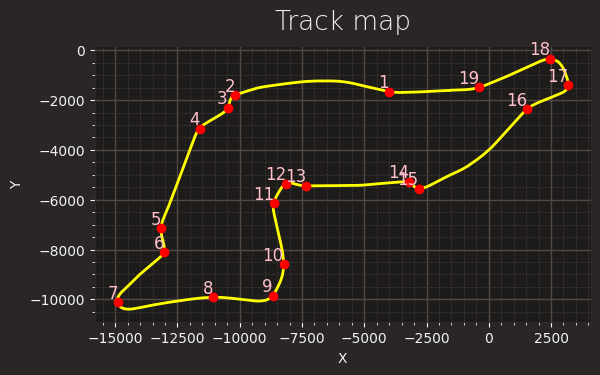

In [179]:
fig, axes = plt.subplots()

axes.plot(telemetry_driver['X'], telemetry_driver['Y'], color='yellow', linewidth = 2)

axes.plot(track_corners['X'], track_corners['Y'], 'ro')

for i, (x, y, corner_number) in track_corners[['X', 'Y', 'Number']].iterrows():
    axes.text(x, y, str(int(corner_number)), color='pink', fontsize=12, ha='right', va='bottom')


axes.set(xlabel = "X", ylabel = "Y", title="Track map")

axes.set_aspect('equal', adjustable='box')

<b>Speed</b>

In [180]:
v = telemetry_driver['Speed'] / 3.6     # km/h > m/s
time_float = telemetry_driver['Time'] / np.timedelta64(1, 's')  # dd > seconds

[Text(0.5, 0, 'Distance (m)'), Text(0, 0.5, 'Speed (km/h)')]

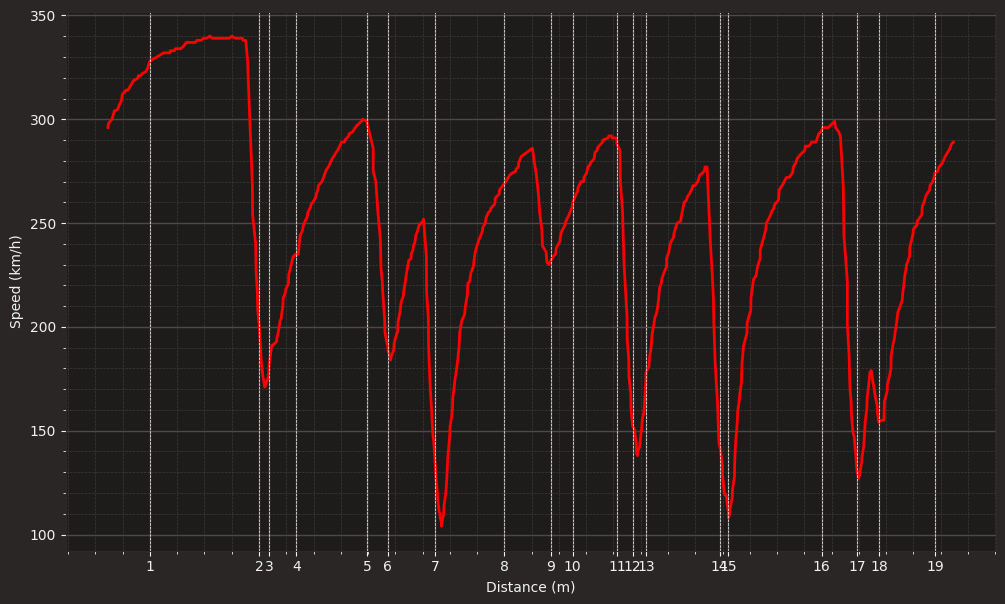

In [181]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.plot(telemetry_driver['Distance'], telemetry_driver['Speed'], color='r', linewidth = 2)

for distance, number in zip(track_corners['Distance'], track_corners['Number']):
    axes.axvline(x=distance, linestyle='--', color='w', linewidth = 0.5)

axes.set_xticks(track_corners['Distance'])
axes.set_xticklabels(track_corners['Number'])

axes.set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")
# axes.set_aspect('equal', adjustable='box')


<b>List of drivers fastest times</b>

In [182]:
drivers_list = session.drivers

drivers_fastest_laps = []
for driver_number in drivers_list:
    fastest_lap = session.laps.pick_driver(driver_number).pick_fastest()
    if not fastest_lap.isnull().all():
        drivers_fastest_laps.append(fastest_lap)


c:\Users\Luca\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:3112: FutureWarning: In the future, `None` will be returned instead of an empty `Lap` object when there are no laps that satisfy the definition for fastest lap.
  warnings.warn(("In the future, `None` will be returned instead of "


<b>Drivers fastest lap times [BAR]</b>

(72.746, 77.417)

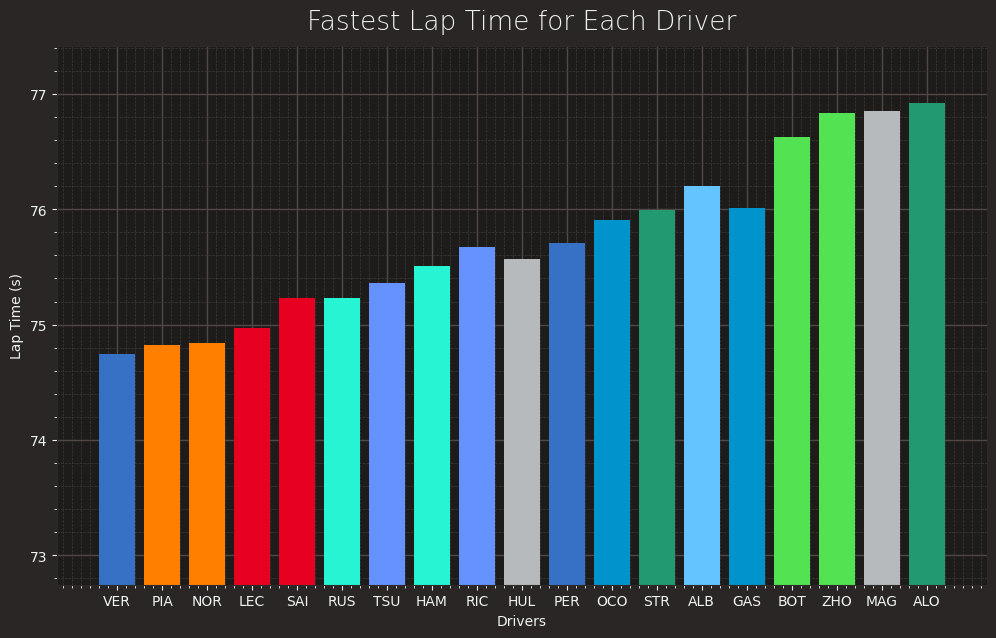

In [183]:
drivers = []
lap_times = []

for d in drivers_fastest_laps:
    lap_time_seconds = (d.LapTime / np.timedelta64(1, 's'))
    drivers.append(d.Driver)
    lap_times.append(lap_time_seconds)

bar_colors = ['#' + results.loc[results['Abbreviation'] == driver, 'TeamColor'].iloc[0] for driver in drivers]

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(drivers, lap_times, color=bar_colors)

ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Fastest Lap Time for Each Driver')

min_y = min(lap_times) - 2  # 2 seconds below the minimum lap time
max_y = max(lap_times) + 0.5 # 2 seconds above the maximum lap time
ax.set_ylim([min_y, max_y])

<b>List of teams fastest times</b>

In [184]:
teams_list = session.laps['Team'].unique()

teams_fastest_laps = []
for team_name in teams_list:
    fastest_lap = session.laps.pick_team(team_name).pick_fastest()
    if not fastest_lap.isnull().all():
        teams_fastest_laps.append(fastest_lap)


(72.746, 77.126)

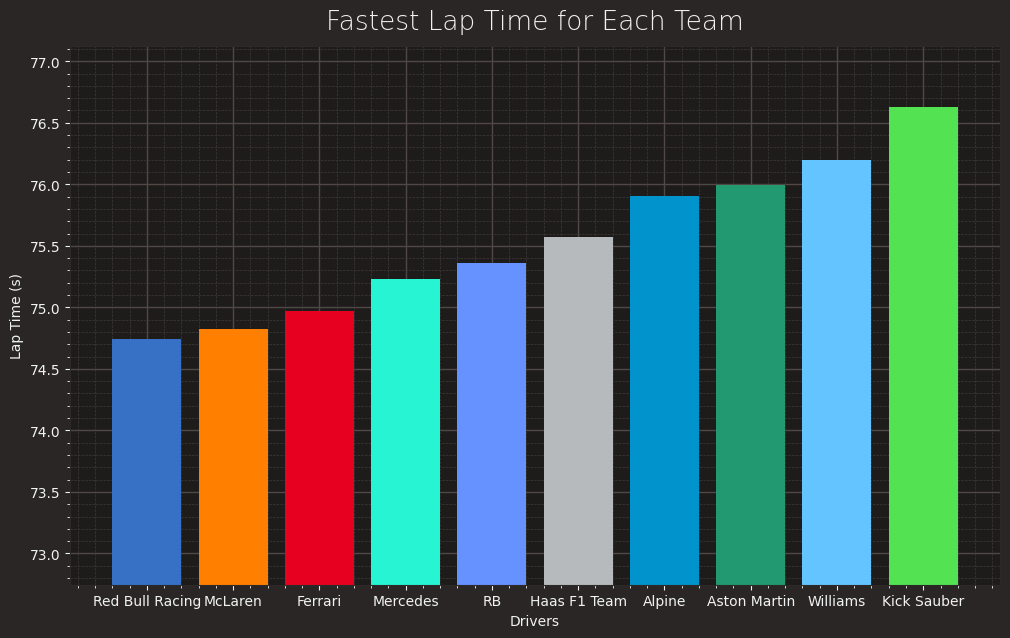

In [185]:
teams = []
lap_times = []

for t in teams_fastest_laps:
    lap_time_seconds = (t.LapTime / np.timedelta64(1, 's'))
    teams.append(t.Team)
    lap_times.append(lap_time_seconds)

bar_colors = ['#' + results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]
#bar_colors = [team_colors.get(team, 'gray') for team in teams]

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(teams, lap_times, color=bar_colors)

ax.set_xlabel('Drivers')
ax.set_ylabel('Lap Time (s)')
ax.set_title('Fastest Lap Time for Each Team')

min_y = min(lap_times) - 2  # 2 seconds below the minimum lap time
max_y = max(lap_times) + 0.5 # 2 seconds above the maximum lap time
ax.set_ylim([min_y, max_y])

In [186]:
def printCross(ax, average_vs, max_vs):
    # Calculate the intersection point of the diagonalsmin_avg_v = min(average_vs)
    min_avg_v = min(average_vs)
    max_avg_v = max(average_vs)
    min_max_v = min(max_vs)
    max_max_v = max(max_vs)

    intersection_avg_v = (min_avg_v + max_avg_v) / 2
    intersection_max_v = (min_max_v + max_max_v) / 2

    # Adding vertical and horizontal lines at the intersection point
    ax.axhline(y=intersection_max_v, color='gray', linestyle='-')
    ax.axvline(x=intersection_avg_v, color='gray', linestyle='-')

    ax.text(max_avg_v, intersection_max_v, "Quick", color='w', fontsize=12, ha='center', va='center')
    ax.text(min_avg_v, intersection_max_v, "Slow", color='w', fontsize=12, ha='center', va='center')

    ax.text(intersection_avg_v, max_max_v, "Low Drag", color='w', fontsize=12, ha='center', va='center')
    ax.text(intersection_avg_v, min_max_v, "High Drag", color='w', fontsize=12, ha='center', va='center')

    # Adding two diagonals
    ax.plot([min_avg_v, max_avg_v], [min_max_v, max_max_v], color='gray', linestyle='-')
    ax.plot([min_avg_v, max_avg_v], [max_max_v, min_max_v], color='gray', linestyle='-')

    ax.text(max_avg_v, max_max_v, "Correlated with \nHigh Efficiency", color='w', fontsize=12, ha='right', va='top')
    ax.text(min_avg_v, min_max_v, "Correlated with \nLow Efficiency", color='w', fontsize=12, ha='left', va='bottom')

    ax.text(max_avg_v, min_max_v, "Correlated with \nHigh Downforce", color='w', fontsize=12, ha='right', va='bottom')
    ax.text(min_avg_v, max_max_v, "Correlated with \nLow Downforce", color='w', fontsize=12, ha='left', va='top')
    
    return()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core      

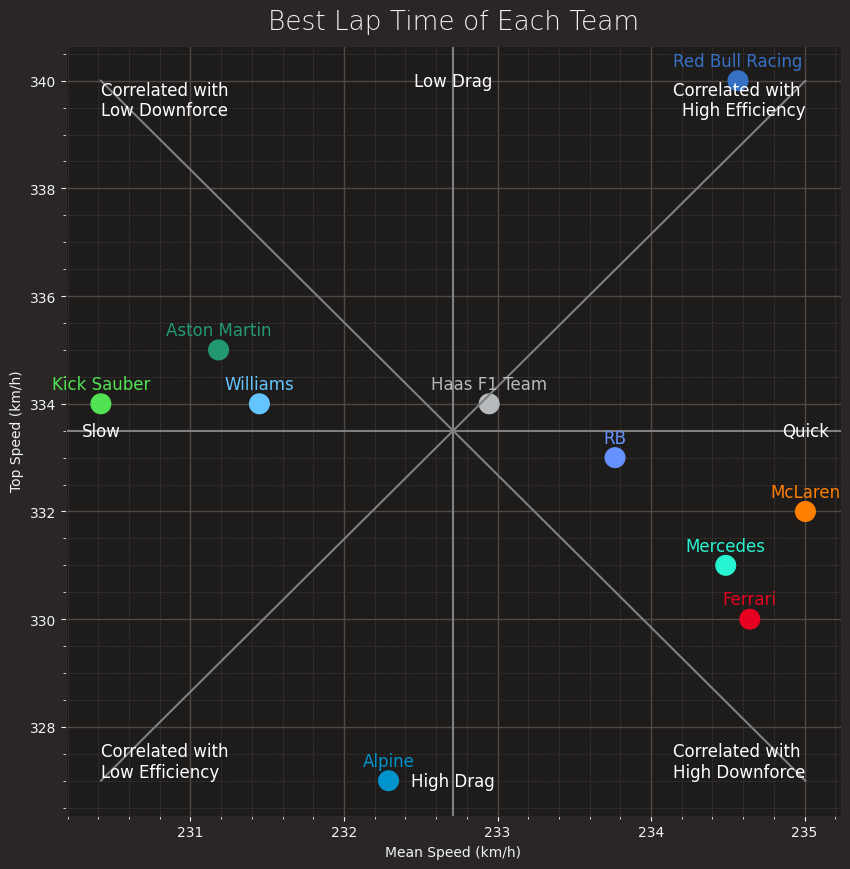

In [187]:
teams = []
average_vs = []
max_vs = []

for t in teams_fastest_laps:
    telemetry_team = t.get_telemetry()
    v = telemetry_team['Speed']
    average_v = sum(v) / len(v)
    
    max_v = max(v)
    teams.append(t.Team)
    average_vs.append(average_v)
    max_vs.append(max_v)

bar_col = [results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]
bar_colors = ['#' + results.loc[results['TeamName'] == team, 'TeamColor'].iloc[0] for team in teams]

fig, ax = plt.subplots(figsize=(10, 10))

printCross(ax, average_vs, max_vs)

# Print values
ax.scatter(average_vs, max_vs, color=bar_colors, s=200)

for i in range(len(average_vs)):
    ax.text(average_vs[i], 
              max_vs[i]+0.2, 
              results.loc[results['TeamColor'] == bar_col[i], 'TeamName'].iloc[0], 
              color=bar_colors[i], 
              fontsize=12, ha='center', va='bottom')


ax.set_xlabel('Mean Speed (km/h)')
ax.set_ylabel('Top Speed (km/h)')
ax.set_title('Best Lap Time of Each Team')

# min_x = min(average_vs) - 0.2  # 2 seconds below the minimum lap time
# max_x = max(average_vs) + 0.2 # 2 seconds above the maximum lap time
# ax.set_xlim([min_x, min_x])

axes.set_aspect('equal', adjustable='box')


<b>Longitudinal and Lateral acceleration</b>

In [188]:
def convert_to_g(accelerations_ms2):
    g = 9.81
    return accelerations_ms2 / g


In [189]:
import math
#
# Define a set of helper functions to perform the computations
#
def smooth_derivative(t_in,v_in):

    #
    # Function to compute a smooth estimation of a derivative.
    # [REF: http://holoborodko.com/pavel/numerical-methods/numerical-derivative/smooth-low-noise-differentiators/]
    #
    
    # Configuration
    #
    # Derivative method: two options: 'smooth' or 'centered'. Smooth is more conservative
    # but helps to supress the very noisy signals. 'centered' is more agressive but more noisy
    method = "smooth"   
    #method = "centered"   

    
    t = t_in.copy()
    v = v_in.copy()
    
    # (0) Prepare inputs
    
    # (0.1) Time needs to be transformed to seconds
    try:
        for i in range(0,t.size):
            t.iloc[i] = t.iloc[i].total_seconds()
    except:
        pass
    
    t = np.array(t);
    v = np.array(v);
    
    # (0.1) Assert they have the same size
    assert t.size == v.size;
    
    # (0.2) Initialize output
    dvdt = np.zeros(t.size);
    
    # (1) Manually compute points out of the stencil
    
    # (1.1) First point
    dvdt[0] = (v[1]-v[0])/(t[1]-t[0]);
    
    # (1.2) Second point
    dvdt[1] = (v[2]-v[0])/(t[2]-t[0])
    
    # (1.3) Third point
    dvdt[2] = (v[3]-v[1])/(t[3]-t[1])
    
    # (1.4) Last points
    n = t.size
    dvdt[n-1] = (v[n-1]-v[n-2])/(t[n-1]-t[n-2])
    dvdt[n-2] = (v[n-1]-v[n-3])/(t[n-1]-t[n-3])
    dvdt[n-3] = (v[n-2]-v[n-4])/(t[n-2]-t[n-4])

    # (2) Compute the rest of the points
    if (method=='smooth'):
        c = [5./32., 4./32., 1./32.]
        for i in range(3,t.size-3):
            for j in range(1,4):
                dvdt[i] += 2*j*c[j-1]*(v[i+j]-v[i-j])/(t[i+j]-t[i-j])
    elif (method == 'centered'):
        for i in range(3,t.size-2):
            for j in range(1,4):
                dvdt[i] = (v[i+1]-v[i-1])/(t[i+1]-t[i-1])
                
    return dvdt;

def truncated_remainder(dividend, divisor):
    divided_number = dividend / divisor
    divided_number = \
        -int(-divided_number) if divided_number < 0 else int(divided_number)

    remainder = dividend - divisor * divided_number

    return remainder

def transform_to_pipi(input_angle):
    pi = math.pi
    revolutions = int((input_angle + np.sign(input_angle) * pi) / (2 * pi))

    p1 = truncated_remainder(input_angle + np.sign(input_angle) * pi, 2 * pi)
    p2 = (np.sign(np.sign(input_angle)
                  + 2 * (np.sign(math.fabs((truncated_remainder(input_angle + pi, 2 * pi))
                                      / (2 * pi))) - 1))) * pi

    output_angle = p1 - p2

    return output_angle, revolutions

def remove_acceleration_outliers(acc):
    
    #acc_threshold_g = 10.0;
    acc_threshold_g = 7.0
    if (math.fabs(acc[0]) > acc_threshold_g):
        acc[0] = 0.0
        
    for i in range(1,acc.size-1):
        if ( math.fabs(acc[i]) > acc_threshold_g ):
            acc[i] = acc[i-1]
            
    if (math.fabs(acc[-1]) > acc_threshold_g ):
        acc[-1] = acc[-2]            

    return acc;

def compute_accelerations(telemetry):

    v = np.array(telemetry['Speed'])/3.6;
    lon_acc = smooth_derivative(telemetry['Time'],v)/9.81

    dx = smooth_derivative(telemetry['Distance'],telemetry['X'])
    dy = smooth_derivative(telemetry['Distance'],telemetry['Y'])

    theta = np.zeros(dx.size)
    theta[0] = math.atan2(dy[0],dx[0])
    for i in range(0,dx.size):
        theta[i] = theta[i-1] + transform_to_pipi(math.atan2(dy[i],dx[i])-theta[i-1])[0]
        
    kappa = smooth_derivative(telemetry['Distance'], theta)
    lat_acc = v*v*kappa/9.81;
    
    # Remove outliers
    lon_acc = remove_acceleration_outliers(lon_acc)
    lat_acc = remove_acceleration_outliers(lat_acc)
    
    return lon_acc, lat_acc;

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


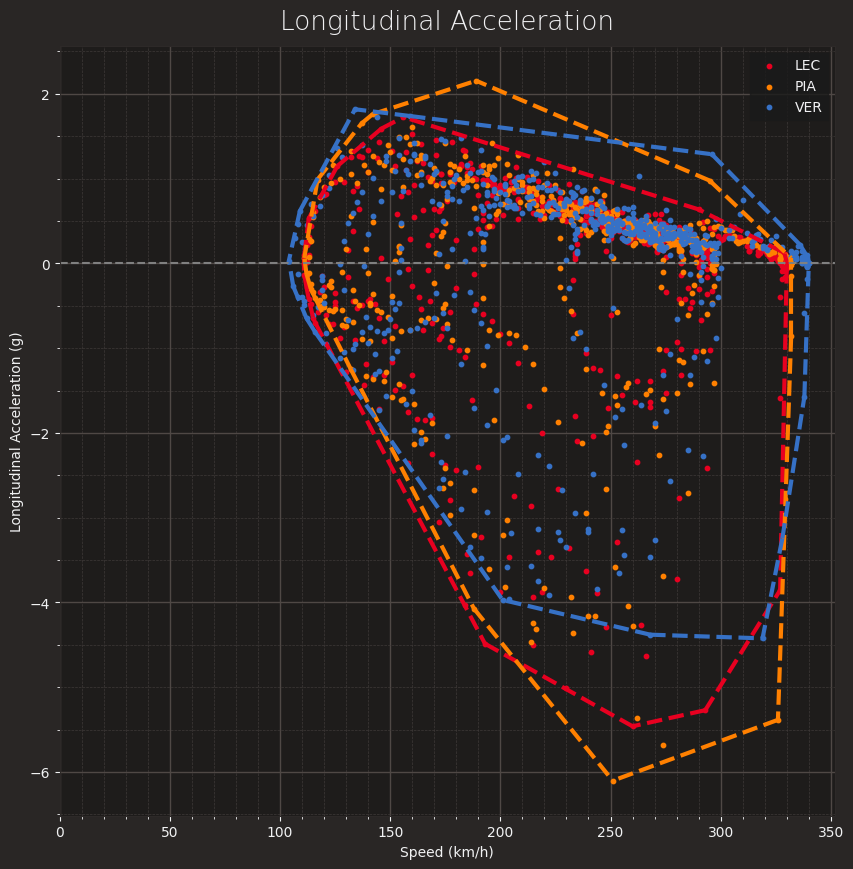

In [190]:
# Longitudinal acceleration
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(10, 10))

indices = [3, 1, 0]
#indices = [2, 1, 0]

for index in indices:
    d = drivers_fastest_laps[index]
    # Telemetry of the driver
    telemetry_d = d.get_telemetry()
    lon_acc, lat_acc = compute_accelerations(telemetry_d)

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
    
    # Print values
    ax.scatter(telemetry_d['Speed'], 
               lon_acc, 
               color=driver_color, 
               s=10,
               label=d.Driver)

    points = np.column_stack((telemetry_d['Speed'], lon_acc))

    # Compute the convex hull
    hull = ConvexHull(points)

    # Plot the convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color=driver_color, linestyle='--', linewidth = 3)

    
ax.axhline(y=0, color='grey', linestyle='--')

ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Longitudinal Acceleration (g)')
ax.set_title('Longitudinal Acceleration')
ax.set_xlim(0, None)

ax.legend()

plt.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


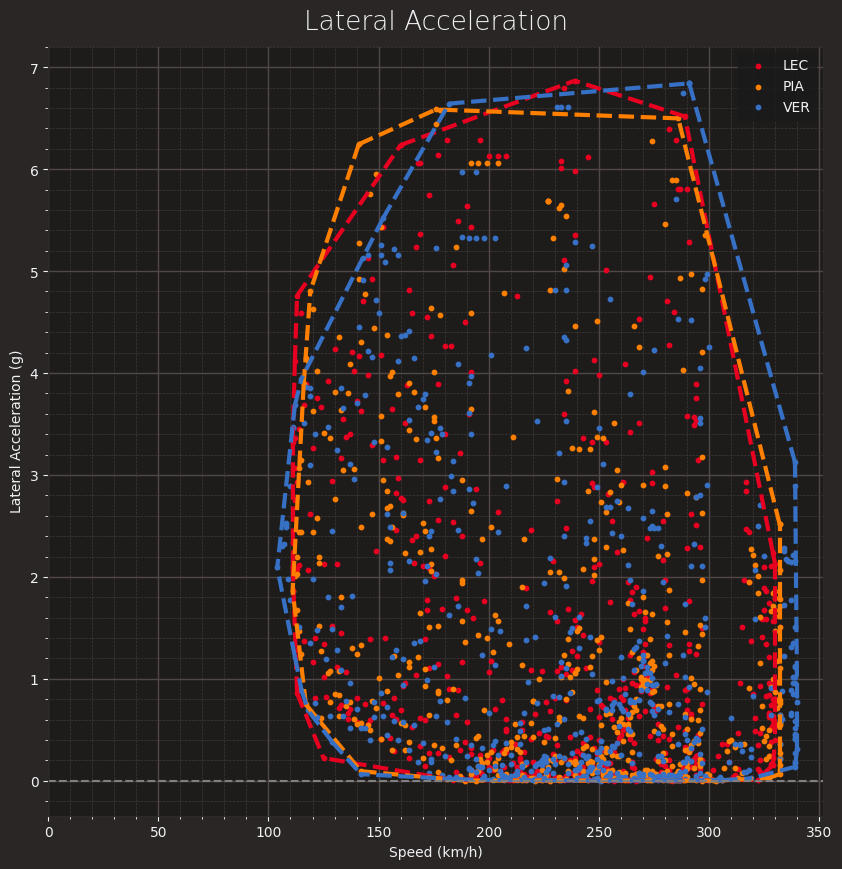

In [191]:
# Lateral acceleration
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(10, 10))

indices = [3, 1, 0]
#indices = [2, 1, 0]

for index in indices:
    d = drivers_fastest_laps[index]
    # Telemetry of the driver
    telemetry_d = d.get_telemetry()
    lon_acc, lat_acc = compute_accelerations(telemetry_d)

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
    
    lat_acc = abs(lat_acc)
    # Print values
    ax.scatter(telemetry_d['Speed'], 
               lat_acc, 
               color=driver_color, 
               s=10,
               label=d.Driver)

    points = np.column_stack((telemetry_d['Speed'], lat_acc))

    # Compute the convex hull
    hull = ConvexHull(points)

    # Plot the convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color=driver_color, linestyle='--', linewidth = 3)

    
ax.axhline(y=0, color='grey', linestyle='--')

ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Lateral Acceleration (g)')
ax.set_title('Lateral Acceleration')
ax.set_xlim(0, None)

ax.legend()

plt.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


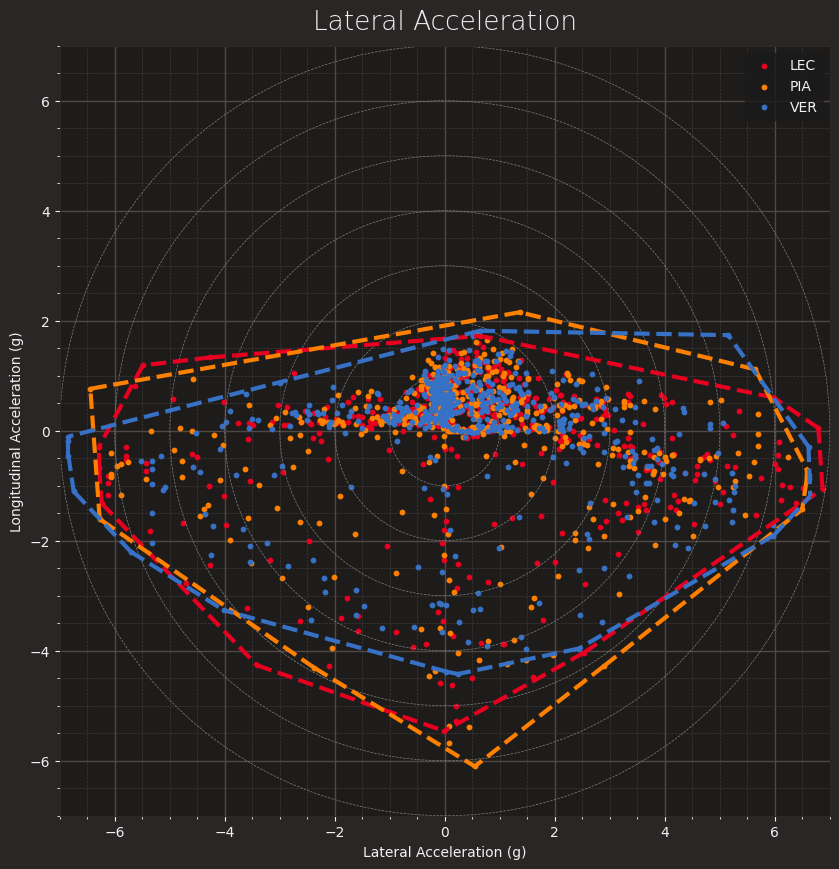

In [192]:
# Lateral and Longitudinal acceleration
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(10, 10))

indices = [3, 1, 0]
#indices = [2, 1, 0]

for index in indices:
    d = drivers_fastest_laps[index]
    # Telemetry of the driver
    telemetry_d = d.get_telemetry()
    lon_acc, lat_acc = compute_accelerations(telemetry_d)

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
    
    # Print values
    ax.scatter(lat_acc, 
               lon_acc, 
               color=driver_color, 
               s=10,
               label=d.Driver)

    points = np.column_stack((lat_acc, lon_acc))

    # Compute the convex hull
    hull = ConvexHull(points)

    # Plot the convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color=driver_color, linestyle='--', linewidth = 3)

# Add concentric circles
max_range = max(max(lat_acc), max(lon_acc), abs(min(lat_acc)), abs(min(lon_acc)))
max_range = math.ceil(max_range)
for radius in range(1, max_range+1):  # Adjust the range as needed
    circle = plt.Circle((0, 0), radius, color='grey', fill=False, linestyle='--', linewidth=0.5)
    ax.add_artist(circle)
    
ax.set_xlabel('Lateral Acceleration (g)')
ax.set_ylabel('Longitudinal Acceleration (g)')
ax.set_title('Lateral Acceleration')
ax.legend()

ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)
ax.set_aspect('equal')

plt.show()

In [193]:
lon_acc, lat_acc = compute_accelerations(telemetry_driver)

C:\Users\Luca\AppData\Local\Temp\ipykernel_21424\2548681775.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


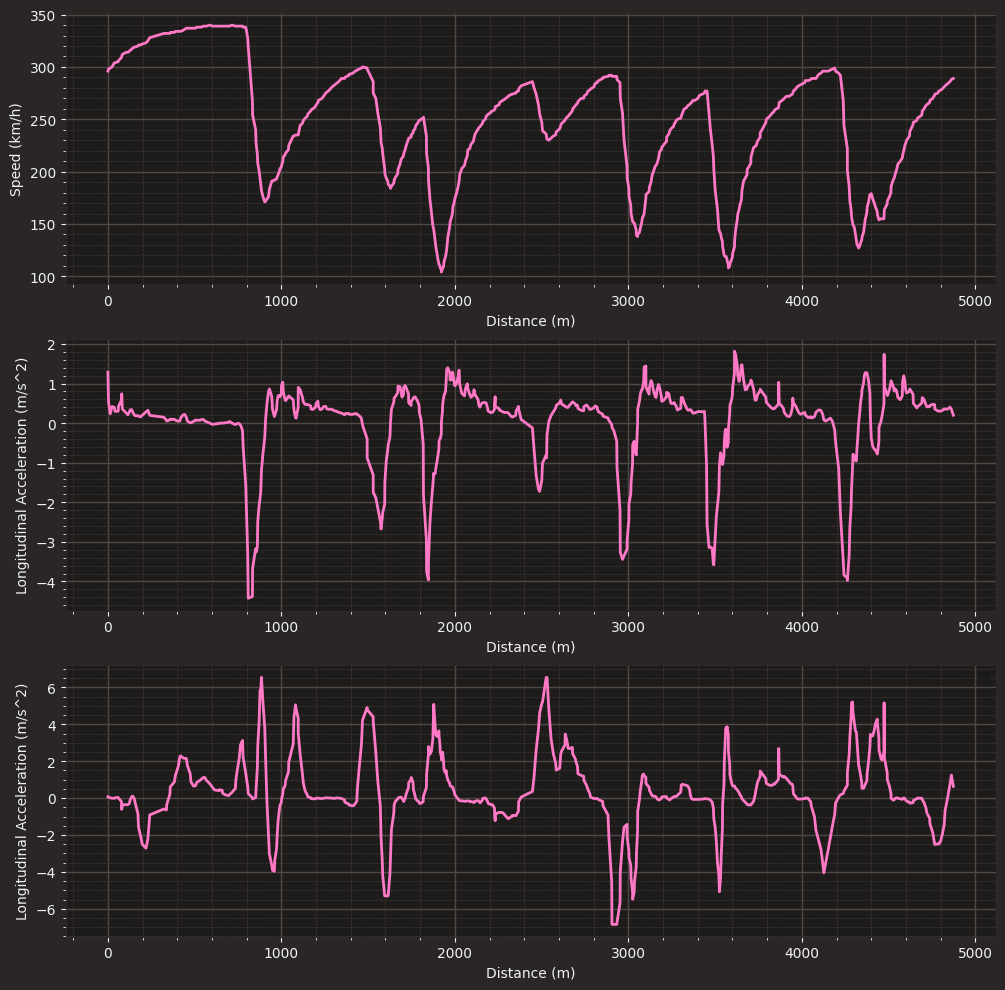

In [194]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
axes[0].plot(telemetry_driver['Distance'], telemetry_driver['Speed'], linewidth = 2)
axes[0].set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")

axes[1].plot(telemetry_driver['Distance'], lon_acc, linewidth = 2)
axes[1].set(xlabel = "Distance (m)", ylabel = "Longitudinal Acceleration (m/s^2)")

axes[2].plot(telemetry_driver['Distance'], lat_acc, linewidth = 2)
axes[2].set(xlabel = "Distance (m)", ylabel = "Longitudinal Acceleration (m/s^2)")

axes[2].legend()

<b>Gaps</b>

Text(0.5, 0, 'Gap (s)')

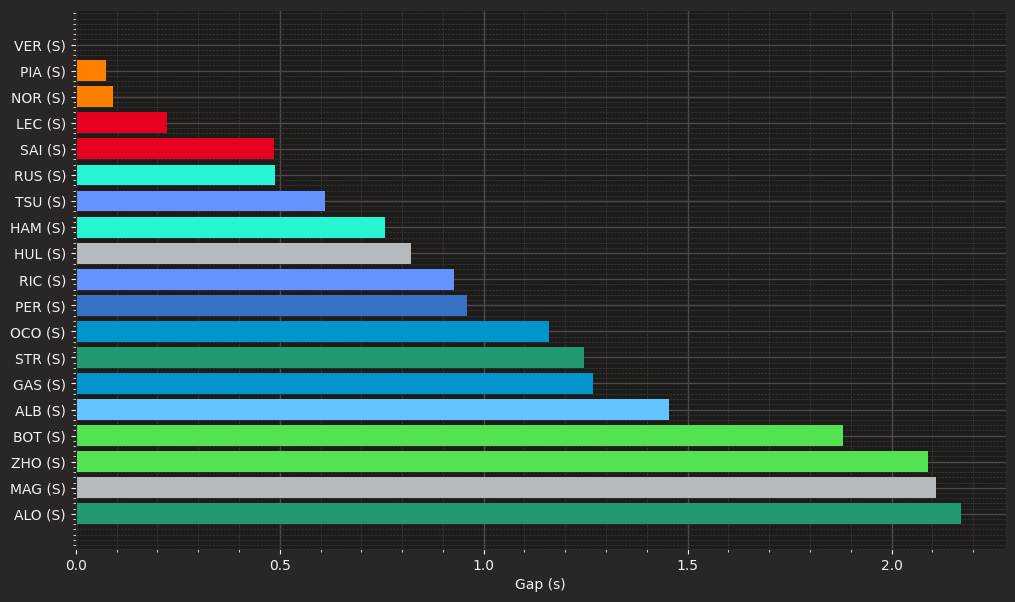

In [221]:
def calculate_gap(fastest_lap, lap):
    return (lap - fastest_lap)

drivers = []
drivers_compound = []
gap_times = []

# Collect data into a list of tuples: (lap_time_seconds, driver, compound)
data = []
for d in drivers_fastest_laps:
    lap_time_seconds = (d.LapTime / np.timedelta64(1, 's'))
    data.append((lap_time_seconds, d.Driver, d.Compound[0]))

data.sort(key=lambda x: x[0])

fastest_lap_s = data[0][0]
gap_times = [calculate_gap(fastest_lap_s, lap_time_seconds) for lap_time_seconds, _, _ in data]
drivers = [driver for _, driver, _ in data]
drivers_compound = [f"{driver} ({compound})" for _, driver, compound in data]

bar_colors = ['#' + results.loc[results['Abbreviation'] == driver, 'TeamColor'].iloc[0] for driver in drivers]

fig, ax = plt.subplots(figsize=(12, 7))
ax.barh(drivers_compound[::-1], gap_times[::-1], color=bar_colors[::-1])

ax.set_xlabel('Gap (s)')


In [205]:
drivers_fastest_laps[0]

Time                      0 days 01:12:47.529000
Driver                                       VER
DriverNumber                                   1
LapTime                   0 days 00:01:14.746000
LapNumber                                   17.0
Stint                                        6.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:23.408000
Sector2Time               0 days 00:00:25.922000
Sector3Time               0 days 00:00:25.416000
Sector1SessionTime        0 days 01:11:56.191000
Sector2SessionTime        0 days 01:12:22.113000
Sector3SessionTime        0 days 01:12:47.529000
SpeedI1                                    233.0
SpeedI2                                    261.0
SpeedFL                                    285.0
SpeedST                                    296.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife            

In [197]:
telemetry_driver.add

<bound method flex_arith_method_FRAME.<locals>.f of                        Date            SessionTime DriverAhead  \
2   2024-05-18 14:59:12.512 0 days 01:11:32.783000               
3   2024-05-18 14:59:12.556 0 days 01:11:32.827000               
4   2024-05-18 14:59:12.675 0 days 01:11:32.946000               
5   2024-05-18 14:59:12.796 0 days 01:11:33.067000          27   
6   2024-05-18 14:59:12.956 0 days 01:11:33.227000          27   
..                      ...                    ...         ...   
559 2024-05-18 15:00:26.656 0 days 01:12:46.927000          44   
560 2024-05-18 15:00:26.836 0 days 01:12:47.107000          44   
561 2024-05-18 15:00:27.015 0 days 01:12:47.286000          44   
562 2024-05-18 15:00:27.116 0 days 01:12:47.387000          44   
563 2024-05-18 15:00:27.258 0 days 01:12:47.529000          44   

     DistanceToDriverAhead                   Time    RPM  Speed  nGear  \
2                67.126667        0 days 00:00:00  10878    296      7   
3      

In [198]:
session.car_data

{'1':                          Date  RPM  Speed  nGear  Throttle  Brake  DRS Source  \
 0     2024-05-18 13:49:26.863    0      0      0         0  False    0    car   
 1     2024-05-18 13:49:27.023    0      0      0         0  False    0    car   
 2     2024-05-18 13:49:27.263    0      0      0         0  False    0    car   
 3     2024-05-18 13:49:27.463    0      0      0         0  False    0    car   
 4     2024-05-18 13:49:27.743    0      0      0         0  False    0    car   
 ...                       ...  ...    ...    ...       ...    ...  ...    ...   
 16683 2024-05-18 15:03:05.756    0      0      0       104   True    8    car   
 16684 2024-05-18 15:03:06.196    0      0      0       104   True    8    car   
 16685 2024-05-18 15:03:06.476    0      0      0       104   True    8    car   
 16686 2024-05-18 15:03:06.676    0      0      0       104   True    8    car   
 16687 2024-05-18 15:03:06.916    0      0      0       104   True    8    car   
 
         

In [199]:
team_color = results.loc[results['DriverNumber'] == '1', 'TeamColor'].iloc[0]
print(team_color)

3671C6


In [200]:
results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,,NaN,0 days 00:01:15.762000,0 days 00:01:15.176000,0 days 00:01:14.746000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,2.0,,NaN,0 days 00:01:15.940000,0 days 00:01:15.407000,0 days 00:01:14.820000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,3.0,,NaN,0 days 00:01:15.915000,0 days 00:01:15.371000,0 days 00:01:14.837000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,4.0,,NaN,0 days 00:01:15.823000,0 days 00:01:15.328000,0 days 00:01:14.970000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,E80020,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,5.0,,NaN,0 days 00:01:16.015000,0 days 00:01:15.512000,0 days 00:01:15.233000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,6.0,,NaN,0 days 00:01:16.107000,0 days 00:01:15.671000,0 days 00:01:15.234000,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,7.0,,NaN,0 days 00:01:15.894000,0 days 00:01:15.358000,0 days 00:01:15.465000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,8.0,,NaN,0 days 00:01:16.604000,0 days 00:01:15.677000,0 days 00:01:15.504000,NaT,,NaN
3,3,D RICCIARDO,RIC,ricciardo,RB,6692FF,rb,Daniel,Ricciardo,Daniel Ricciardo,...,AUS,9.0,,NaN,0 days 00:01:16.060000,0 days 00:01:15.691000,0 days 00:01:15.674000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,GER,10.0,,NaN,0 days 00:01:15.841000,0 days 00:01:15.569000,0 days 00:01:15.980000,NaT,,NaN


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


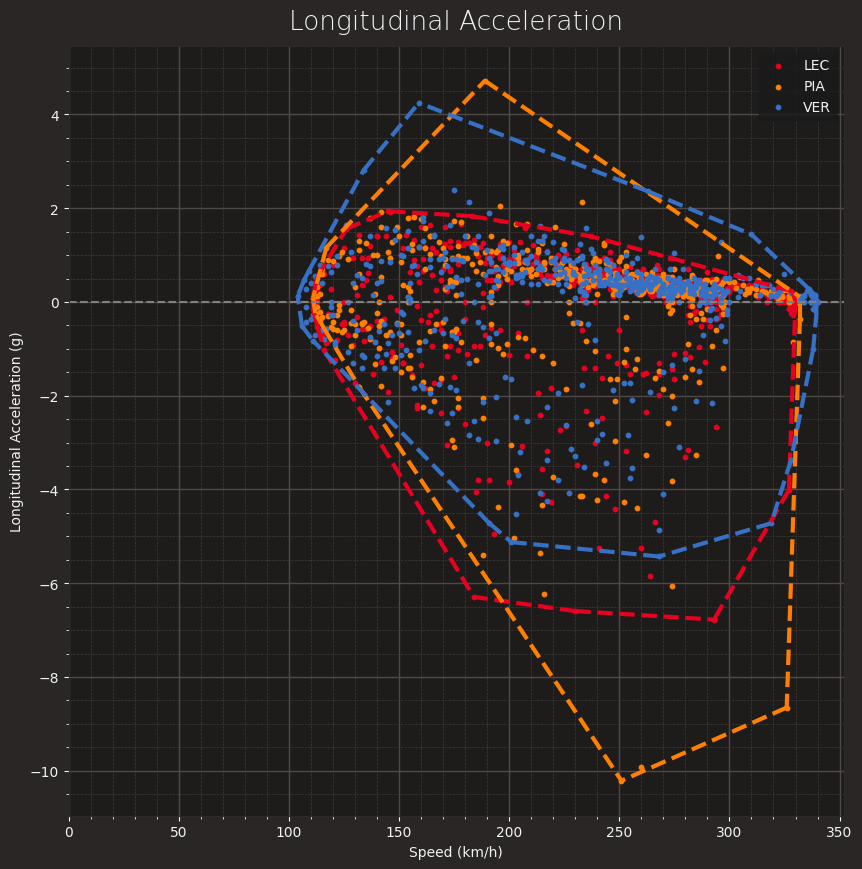

In [201]:
from scipy.spatial import ConvexHull

fig, ax = plt.subplots(figsize=(10, 10))

indices = [3, 1, 0]
#indices = [2, 1, 0]

for index in indices:
    d = drivers_fastest_laps[index]
    # Telemetry of the driver
    telemetry_d = d.get_telemetry()
    lon_acc, lat_acc = compute_accelerations(telemetry_d)

    # Speed and time to calculate the logitudinal acceleration
    v = telemetry_d['Speed'] / 3.6    # Speed in m/s
    time_float = telemetry_d['Time'] / np.timedelta64(1, 's')

    long_acceleration = np.gradient(v)/np.gradient(time_float)
    long_acceleration_smooth = np.convolve(long_acceleration, np.ones((3,))/3, mode = 'same')

    long_acceleration_g = convert_to_g(long_acceleration)

    driver_color = '#' + results.loc[results['Abbreviation'] == d.Driver, 'TeamColor'].iloc[0]
    
    # Print values
    ax.scatter(telemetry_d['Speed'], 
               long_acceleration_g, 
               color=driver_color, 
               s=10,
               label=d.Driver)

    points = np.column_stack((telemetry_d['Speed'], long_acceleration_g))

    # Compute the convex hull
    hull = ConvexHull(points)

    # Plot the convex hull
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], color=driver_color, linestyle='--', linewidth = 3)

    
ax.axhline(y=0, color='grey', linestyle='--')

ax.set_xlabel('Speed (km/h)')
ax.set_ylabel('Longitudinal Acceleration (g)')
ax.set_title('Longitudinal Acceleration')
ax.set_xlim(0, None)

ax.legend()

plt.show()